# PART 1: Time Series Forecasting

In [ ]:
# Data @ https://www.kaggle.com/datasets/vagifa/usa-commodity-prices?resource=download

#Wish to focus on  Monthly Price Data of Uranium in the period 1992-2016

import tensorflow as tf
import os
import pandas as pd
import numpy as np
from google.colab import files


In [ ]:
path="/content/drive/MyDrive/commodity-prices-2016.csv"

**Reading CSV File**

In [ ]:
df=pd.read_csv(path)
df

,Date,All Commodity Price Index,Non-Fuel Price Index,Food and Beverage Price Index,Food Price Index,Beverage Price Index,Industrial Inputs Price Index,Agricultural Raw Materials Index,Metals Price Index,Fuel Energy Index,...,Sugar Free Market,Sugar U.S. import price,Sunflower oil,Tea,Tin,Uranium,Wheat,Wool coarse,Wool fine,Zinc
0,1980-01-01,NaN,NaN,NaN,NaN,189.310021,81.889650,78.900146,84.049004,NaN,...,17.299999,19.660000,566.926957,225.179901,16973.587904,40.000000,175.634750,553.120940,684.277366,773.821533
1,1980-02-01,NaN,NaN,NaN,NaN,190.387928,83.048367,75.715154,88.345232,NaN,...,22.750000,24.689999,573.958609,233.094498,17090.213164,38.000000,172.695236,568.154805,722.567093,868.620361
2,1980-03-01,NaN,NaN,NaN,NaN,194.060355,75.228895,69.002475,79.726312,NaN,...,19.630001,21.180000,535.284522,226.833298,17460.590400,35.000000,163.509323,552.745109,695.956860,740.752441
3,1980-04-01,NaN,NaN,NaN,NaN,186.137888,72.471253,67.877108,75.789658,NaN,...,21.250000,22.669998,486.062957,221.806793,17041.712600,32.000000,156.528030,510.650280,688.130355,707.683105
4,1980-05-01,NaN,NaN,NaN,NaN,185.070241,69.588103,65.879671,72.266748,NaN,...,30.939999,31.889999,502.763130,229.611206,17180.604736,32.000000,161.304703,524.932443,720.760976,701.069092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,2015-10-01,103.466916,126.907455,137.852216,133.899141,174.342772,115.852355,112.924508,117.967173,89.753388,...,14.141818,25.038182,1059.053125,391.840000,15794.613636,36.955163,165.388254,884.877380,956.059067,1724.340909
430,2015-11-01,97.467668,122.040427,134.654483,130.371612,174.189364,109.299203,109.512921,109.144832,83.091752,...,14.888000,25.606000,1045.010913,353.773968,14745.285714,35.934567,157.741528,902.048320,1003.058056,1583.309524
431,2015-12-01,90.734792,121.669445,136.304358,132.386700,172.467981,106.886989,109.422638,105.055460,72.636947,...,15.000000,25.830909,1022.144112,343.490783,14691.690476,35.099756,163.793245,909.910775,1028.319875,1527.785714
432,2016-01-01,83.150947,121.295627,136.615213,134.186870,159.031071,105.821596,108.755324,103.702530,60.834986,...,14.291053,25.831579,1020.136508,319.825524,13808.075000,34.622671,164.557592,930.918233,1014.234233,1520.362500


Extracting Few Columns to Work With


In [ ]:
df=df[['Date','All Commodity Price Index','Metals Price Index','Uranium']]
df.describe()

,All Commodity Price Index,Metals Price Index,Uranium
count,290.000000,434.000000,434.000000
mean,100.438645,94.983991,24.951885
std,51.429999,53.636244,20.443110
min,41.971597,44.165892,7.100000
25%,58.176006,57.076454,10.200000
50%,72.484482,69.101923,16.787500
75%,140.798155,120.233157,35.542867
max,219.899500,256.236049,136.222222


In [ ]:
df.head()

,Date,All Commodity Price Index,Metals Price Index,Uranium
0,1980-01-01,NaN,84.049004,40.0
1,1980-02-01,NaN,88.345232,38.0
2,1980-03-01,NaN,79.726312,35.0
3,1980-04-01,NaN,75.789658,32.0
4,1980-05-01,NaN,72.266748,32.0


**Data** **Preprocessing**

In [ ]:
#dropping rows with NaN values
df.dropna(inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Date,All Commodity Price Index,Metals Price Index,Uranium
144,1992-01-01,52.876718,58.451712,8.75
145,1992-02-01,53.020784,60.607861,7.90
146,1992-03-01,52.736939,61.039659,7.75
147,1992-04-01,54.270214,62.008882,7.75
148,1992-05-01,55.577815,62.094826,7.55


In [ ]:
#converting dates from object type to datetime
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


144   1992-01-01
145   1992-02-01
146   1992-03-01
147   1992-04-01
148   1992-05-01
         ...    
429   2015-10-01
430   2015-11-01
431   2015-12-01
432   2016-01-01
433   2016-02-01
Name: Date, Length: 290, dtype: datetime64[ns]

In [ ]:
#making date the index column
df.index = df.pop('Date')
df

,All Commodity Price Index,Metals Price Index,Uranium
Date,,,
1992-01-01,52.876718,58.451712,8.750000
1992-02-01,53.020784,60.607861,7.900000
1992-03-01,52.736939,61.039659,7.750000
1992-04-01,54.270214,62.008882,7.750000
1992-05-01,55.577815,62.094826,7.550000
...,...,...,...
2015-10-01,103.466916,117.967173,36.955163
2015-11-01,97.467668,109.144832,35.934567
2015-12-01,90.734792,105.055460,35.099756


**Building First Model** :

Univariate LSTM Model on Uranium Prices:
Estimates price of Uranium on a particular month based on its prices in the previous 3 months

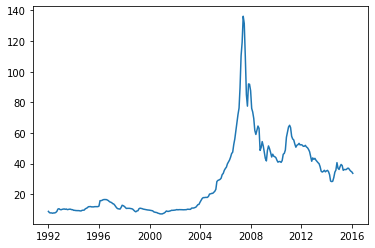

In [ ]:
#working only on uranium prices
df1=df[['Uranium']]
import matplotlib.pyplot as plt

plt.plot(df1.index, df1['Uranium']) #Observing variation of Uranium Prices over the time period in the dataset


In [ ]:
#defining a function that will convert uranium prices column into our training set and labels

def df_to_X_y(df, window_size=3):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [a for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][-1]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 3
X1, y1 = df_to_X_y(df1, WINDOW_SIZE)
X1.shape, y1.shape


((287, 3, 1), (287,))

In [ ]:
#Looking at our data that has been arranged into time steps
X1[:5]

array([[[8.75],
        [7.9 ],
        [7.75]],

       [[7.9 ],
        [7.75],
        [7.75]],

       [[7.75],
        [7.75],
        [7.55]],

       [[7.75],
        [7.55],
        [7.75]],

       [[7.55],
        [7.75],
        [7.75]]])

In [ ]:
#dividing data into training data, validation data and testing data

X_train1, y_train1 = X1[:200], y1[:200]
X_val1, y_val1 = X1[200:250], y1[200:250]
X_test1, y_test1 = X1[250:], y1[250:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((200, 3, 1), (200,), (50, 3, 1), (50,), (37, 3, 1), (37,))

In [ ]:
#Designing LSTM Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError


model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss=MeanSquaredError(), 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

cp1 = ModelCheckpoint('model1/', save_best_only=True)

model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1])

Epoch 1/100
1/7 [===>..........................] - ETA: 10s - loss: 1564.4335 - root_mean_squared_error: 39.5529

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 6s 769ms/step - loss: 1125.8110 - root_mean_squared_error: 33.5531 - val_loss: 2392.6204 - val_root_mean_squared_error: 48.9144
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 882.8588 - root_mean_squared_error: 29.7129

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 4s 685ms/step - loss: 1094.3530 - root_mean_squared_error: 33.0810 - val_loss: 2329.0928 - val_root_mean_squared_error: 48.2607
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 464.4436 - root_mean_squared_error: 21.5510

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 5s 792ms/step - loss: 1061.3794 - root_mean_squared_error: 32.5788 - val_loss: 2252.2031 - val_root_mean_squared_error: 47.4574
Epoch 4/100
1/7 [===>..........................] - ETA: 0s - loss: 1842.7686 - root_mean_squared_error: 42.9275

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 5s 880ms/step - loss: 1020.5015 - root_mean_squared_error: 31.9453 - val_loss: 2138.5020 - val_root_mean_squared_error: 46.2439
Epoch 5/100
1/7 [===>..........................] - ETA: 0s - loss: 586.5898 - root_mean_squared_error: 24.2196

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 4s 682ms/step - loss: 959.9048 - root_mean_squared_error: 30.9823 - val_loss: 1978.2625 - val_root_mean_squared_error: 44.4777
Epoch 6/100
1/7 [===>..........................] - ETA: 0s - loss: 349.8300 - root_mean_squared_error: 18.7037

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 4s 685ms/step - loss: 893.7308 - root_mean_squared_error: 29.8953 - val_loss: 1746.9122 - val_root_mean_squared_error: 41.7961
Epoch 7/100
1/7 [===>..........................] - ETA: 0s - loss: 921.6807 - root_mean_squared_error: 30.3592

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 4s 691ms/step - loss: 834.8278 - root_mean_squared_error: 28.8934 - val_loss: 1445.1832 - val_root_mean_squared_error: 38.0156
Epoch 8/100
1/7 [===>..........................] - ETA: 0s - loss: 1281.2112 - root_mean_squared_error: 35.7940

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 5s 839ms/step - loss: 764.9874 - root_mean_squared_error: 27.6584 - val_loss: 1154.0361 - val_root_mean_squared_error: 33.9711
Epoch 9/100
1/7 [===>..........................] - ETA: 0s - loss: 641.6918 - root_mean_squared_error: 25.3316

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 4s 681ms/step - loss: 687.6797 - root_mean_squared_error: 26.2236 - val_loss: 913.5195 - val_root_mean_squared_error: 30.2245
Epoch 10/100
1/7 [===>..........................] - ETA: 0s - loss: 847.7159 - root_mean_squared_error: 29.1156

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 4s 678ms/step - loss: 613.2243 - root_mean_squared_error: 24.7634 - val_loss: 717.6298 - val_root_mean_squared_error: 26.7886
Epoch 11/100
1/7 [===>..........................] - ETA: 0s - loss: 1583.9888 - root_mean_squared_error: 39.7994

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 4s 691ms/step - loss: 537.9661 - root_mean_squared_error: 23.1941 - val_loss: 543.4026 - val_root_mean_squared_error: 23.3110
Epoch 12/100
1/7 [===>..........................] - ETA: 0s - loss: 274.8175 - root_mean_squared_error: 16.5776

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 4s 682ms/step - loss: 441.7052 - root_mean_squared_error: 21.0168 - val_loss: 391.5326 - val_root_mean_squared_error: 19.7872
Epoch 13/100
1/7 [===>..........................] - ETA: 0s - loss: 321.2377 - root_mean_squared_error: 17.9231

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 4s 685ms/step - loss: 359.5004 - root_mean_squared_error: 18.9605 - val_loss: 182.6202 - val_root_mean_squared_error: 13.5137
Epoch 14/100
1/7 [===>..........................] - ETA: 0s - loss: 100.8652 - root_mean_squared_error: 10.0432

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 6s 982ms/step - loss: 269.2249 - root_mean_squared_error: 16.4081 - val_loss: 54.2699 - val_root_mean_squared_error: 7.3668
Epoch 15/100
1/7 [===>..........................] - ETA: 0s - loss: 91.3471 - root_mean_squared_error: 9.5576

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 4s 708ms/step - loss: 194.3645 - root_mean_squared_error: 13.9415 - val_loss: 23.2892 - val_root_mean_squared_error: 4.8259
Epoch 16/100
1/7 [===>..........................] - ETA: 0s - loss: 262.1505 - root_mean_squared_error: 16.1911

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 4s 703ms/step - loss: 140.7747 - root_mean_squared_error: 11.8649 - val_loss: 16.8271 - val_root_mean_squared_error: 4.1021
Epoch 17/100
7/7 [==============================] - 0s 8ms/step - loss: 97.3471 - root_mean_squared_error: 9.8665 - val_loss: 57.0697 - val_root_mean_squared_error: 7.5545
Epoch 18/100
1/7 [===>..........................] - ETA: 0s - loss: 16.3230 - root_mean_squared_error: 4.0402

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 4s 697ms/step - loss: 69.5203 - root_mean_squared_error: 8.3379 - val_loss: 12.6785 - val_root_mean_squared_error: 3.5607
Epoch 19/100
7/7 [==============================] - 0s 7ms/step - loss: 53.1091 - root_mean_squared_error: 7.2876 - val_loss: 17.1091 - val_root_mean_squared_error: 4.1363
Epoch 20/100
7/7 [==============================] - 0s 8ms/step - loss: 43.8970 - root_mean_squared_error: 6.6255 - val_loss: 14.7693 - val_root_mean_squared_error: 3.8431
Epoch 21/100
7/7 [==============================] - 0s 9ms/step - loss: 35.8164 - root_mean_squared_error: 5.9847 - val_loss: 17.9642 - val_root_mean_squared_error: 4.2384
Epoch 22/100
7/7 [==============================] - 0s 8ms/step - loss: 35.1920 - root_mean_squared_error: 5.9323 - val_loss: 23.6343 - val_root_mean_squared_error: 4.8615
Epoch 23/100
1/7 [===>..........................] - ETA: 0s - loss: 39.0183 - root_mean_squared_error: 6.2465

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 4s 704ms/step - loss: 29.2702 - root_mean_squared_error: 5.4102 - val_loss: 9.1810 - val_root_mean_squared_error: 3.0300
Epoch 24/100
7/7 [==============================] - 0s 7ms/step - loss: 29.3819 - root_mean_squared_error: 5.4205 - val_loss: 15.4106 - val_root_mean_squared_error: 3.9256
Epoch 25/100
7/7 [==============================] - 0s 7ms/step - loss: 26.2855 - root_mean_squared_error: 5.1269 - val_loss: 20.6098 - val_root_mean_squared_error: 4.5398
Epoch 26/100
7/7 [==============================] - 0s 8ms/step - loss: 23.0516 - root_mean_squared_error: 4.8012 - val_loss: 9.5690 - val_root_mean_squared_error: 3.0934
Epoch 27/100
7/7 [==============================] - 0s 10ms/step - loss: 20.9554 - root_mean_squared_error: 4.5777 - val_loss: 9.7566 - val_root_mean_squared_error: 3.1236
Epoch 28/100
7/7 [==============================] - 0s 8ms/step - loss: 19.3625 - root_mean_squared_error: 4.4003 - val_loss: 14.9645 - val_root_mean_squ

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 4s 685ms/step - loss: 18.6581 - root_mean_squared_error: 4.3195 - val_loss: 6.6673 - val_root_mean_squared_error: 2.5821
Epoch 33/100
7/7 [==============================] - 0s 7ms/step - loss: 17.2035 - root_mean_squared_error: 4.1477 - val_loss: 11.8889 - val_root_mean_squared_error: 3.4480
Epoch 34/100
1/7 [===>..........................] - ETA: 0s - loss: 3.0152 - root_mean_squared_error: 1.7364

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 4s 698ms/step - loss: 15.4743 - root_mean_squared_error: 3.9337 - val_loss: 6.6654 - val_root_mean_squared_error: 2.5817
Epoch 35/100
7/7 [==============================] - 0s 9ms/step - loss: 15.5914 - root_mean_squared_error: 3.9486 - val_loss: 10.5098 - val_root_mean_squared_error: 3.2419
Epoch 36/100
1/7 [===>..........................] - ETA: 0s - loss: 12.2723 - root_mean_squared_error: 3.5032

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


7/7 [==============================] - 4s 708ms/step - loss: 15.2239 - root_mean_squared_error: 3.9018 - val_loss: 5.1606 - val_root_mean_squared_error: 2.2717
Epoch 37/100
7/7 [==============================] - 0s 8ms/step - loss: 14.9827 - root_mean_squared_error: 3.8708 - val_loss: 16.6288 - val_root_mean_squared_error: 4.0778
Epoch 38/100
7/7 [==============================] - 0s 8ms/step - loss: 14.2749 - root_mean_squared_error: 3.7782 - val_loss: 14.4355 - val_root_mean_squared_error: 3.7994
Epoch 39/100
7/7 [==============================] - 0s 8ms/step - loss: 14.0888 - root_mean_squared_error: 3.7535 - val_loss: 9.4418 - val_root_mean_squared_error: 3.0728
Epoch 40/100
7/7 [==============================] - 0s 9ms/step - loss: 15.0614 - root_mean_squared_error: 3.8809 - val_loss: 10.3039 - val_root_mean_squared_error: 3.2100
Epoch 41/100
7/7 [==============================] - 0s 8ms/step - loss: 13.9703 - root_mean_squared_error: 3.7377 - val_loss: 13.1321 - val_root_mean_squ

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')
print(model1.summary()) #Printing summary of most suitable model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20,065
Trainable params: 20,065
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Comparing model's predictions on training data v actual training observations

train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame({'Train Predictions':train_predictions,"Actuals":y_train1})
train_results

,Train Predictions,Actuals
0,7.732571,7.75000
1,7.943150,7.55000
2,7.731649,7.75000
3,7.987939,7.75000
4,8.033822,8.05000
...,...,...
195,57.816349,61.84375
196,62.803200,64.50000
197,63.840076,63.00000
198,60.135891,48.60000


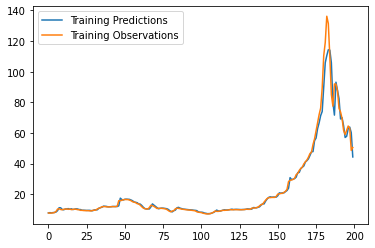

In [ ]:
#Plotting model's predictions of training data v actual training observations

plt.plot(train_predictions)
plt.plot(y_train1)
plt.legend(['Training Predictions', 'Training Observations'])

In [ ]:
#Comparing model's predictions on validation data v actual validation observations


val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,53.043190,54.333333
1,55.886623,51.444444
2,49.462986,47.000000
3,45.845882,43.375000
4,42.893791,41.718750
5,41.907040,48.555556
6,52.464279,51.500000
7,51.675751,49.700000
8,48.545826,47.187500
9,46.652340,44.277778


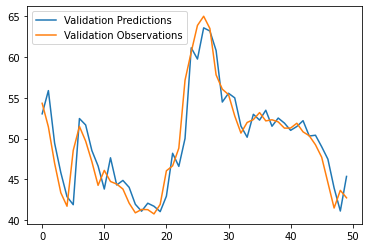

In [ ]:
#Plotting model's predictions on validation data v actual validation observations


plt.plot(val_results['Val Predictions'])
plt.plot(val_results['Actuals'])
plt.legend(['Validation Predictions', 'Validation Observations'])

In [ ]:
#Model now predicts on test data which it has never come across earlier
#Comparing predictions with actual test observations
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

,Test Predictions,Actuals
0,42.547863,43.406250
1,44.227985,42.281250
2,42.213947,41.412500
3,41.664562,40.605000
4,40.865353,39.937500
5,40.251484,38.022222
6,37.902714,34.994163
7,34.651855,34.453287
8,34.923340,34.848496
9,35.519588,35.592003


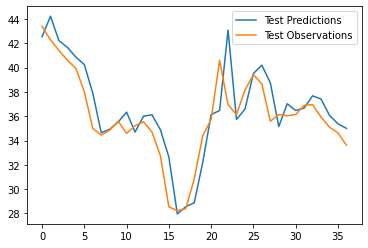

In [ ]:
#Plotting model's predictions on test data v actual test observations
#Model has done a good job since predictions are fairly close to actual data


plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])
plt.legend(['Test Predictions', 'Test Observations'])

In [ ]:
scores = model1.evaluate(X_test1, y_test1)



2/2 [==============================] - 0s 7ms/step - loss: 3.6344 - root_mean_squared_error: 1.9064


**Building Second Model**:

Multivariate LSTM Model : Estimates Uranium prices on a particular month based on Uranium Prices, All Commodity Price Index and Metals Price Index in previous 3 months

In [ ]:
df2=df #Making dataframe with 3 features
df2.head() 

,All Commodity Price Index,Metals Price Index,Uranium
Date,,,
1992-01-01,52.876718,58.451712,8.75
1992-02-01,53.020784,60.607861,7.90
1992-03-01,52.736939,61.039659,7.75
1992-04-01,54.270214,62.008882,7.75
1992-05-01,55.577815,62.094826,7.55


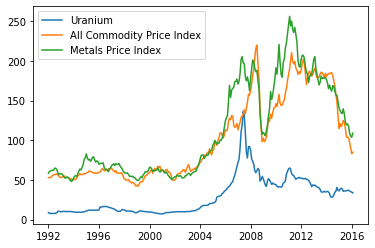

In [ ]:
#Displaying how all the 3 features have varied over time


plt.plot(df2.index, df2['Uranium'])
plt.plot(df2.index, df2['All Commodity Price Index'])
plt.plot(df2.index, df2['Metals Price Index'])
plt.legend(labels=['Uranium','All Commodity Price Index','Metals Price Index'])

In [ ]:
#Converting Data into Time Steps data that can be splitted into train,test, & validation data

WINDOW_SIZE = 3
X2, y2 = df_to_X_y(df2, WINDOW_SIZE)
X2.shape, y2.shape


((287, 3, 3), (287,))

In [ ]:
#Splitting data into training, validation and testing sets

X_train2, y_train2 = X2[:200], y2[:200]
X_val2, y_val2 = X2[200:250], y2[200:250]
X_test2, y_test2 = X2[250:], y2[250:]
X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape
X_train2[:5]

array([[[52.87671831, 58.45171205,  8.75      ],
        [53.02078449, 60.60786079,  7.9       ],
        [52.73693867, 61.03965898,  7.75      ]],

       [[53.02078449, 60.60786079,  7.9       ],
        [52.73693867, 61.03965898,  7.75      ],
        [54.27021395, 62.00888187,  7.75      ]],

       [[52.73693867, 61.03965898,  7.75      ],
        [54.27021395, 62.00888187,  7.75      ],
        [55.57781462, 62.09482585,  7.55      ]],

       [[54.27021395, 62.00888187,  7.75      ],
        [55.57781462, 62.09482585,  7.55      ],
        [56.6235744 , 62.19946515,  7.75      ]],

       [[55.57781462, 62.09482585,  7.55      ],
        [56.6235744 , 62.19946515,  7.75      ],
        [56.7401309 , 64.81432319,  7.75      ]]])

In [ ]:
#Designing Multivariate LSTM Model

model2 = Sequential([layers.Input((3, 3)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model2.compile(loss=MeanSquaredError(), 
              optimizer=Adam(learning_rate=0.001),
              metrics=[RootMeanSquaredError()])

cp2 = ModelCheckpoint('model2/', save_best_only=True)

model2.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=100, callbacks=[cp2])

Epoch 1/100
1/7 [===>..........................] - ETA: 11s - loss: 1443.1035 - root_mean_squared_error: 37.9882

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 7s 777ms/step - loss: 1103.5276 - root_mean_squared_error: 33.2194 - val_loss: 2326.7742 - val_root_mean_squared_error: 48.2366
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 1007.6790 - root_mean_squared_error: 31.7440

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 688ms/step - loss: 1066.5051 - root_mean_squared_error: 32.6574 - val_loss: 2243.2625 - val_root_mean_squared_error: 47.3631
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 1266.1288 - root_mean_squared_error: 35.5827

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 680ms/step - loss: 1024.4008 - root_mean_squared_error: 32.0063 - val_loss: 2138.4387 - val_root_mean_squared_error: 46.2433
Epoch 4/100
1/7 [===>..........................] - ETA: 0s - loss: 1394.4647 - root_mean_squared_error: 37.3425

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 696ms/step - loss: 975.8007 - root_mean_squared_error: 31.2378 - val_loss: 1999.4613 - val_root_mean_squared_error: 44.7153
Epoch 5/100
1/7 [===>..........................] - ETA: 0s - loss: 703.8124 - root_mean_squared_error: 26.5295

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 702ms/step - loss: 915.5274 - root_mean_squared_error: 30.2577 - val_loss: 1809.6678 - val_root_mean_squared_error: 42.5402
Epoch 6/100
1/7 [===>..........................] - ETA: 0s - loss: 575.4048 - root_mean_squared_error: 23.9876

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 696ms/step - loss: 844.4818 - root_mean_squared_error: 29.0600 - val_loss: 1587.3732 - val_root_mean_squared_error: 39.8419
Epoch 7/100
1/7 [===>..........................] - ETA: 0s - loss: 511.3097 - root_mean_squared_error: 22.6122

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 6s 999ms/step - loss: 763.4155 - root_mean_squared_error: 27.6300 - val_loss: 1327.0671 - val_root_mean_squared_error: 36.4289
Epoch 8/100
1/7 [===>..........................] - ETA: 0s - loss: 876.4227 - root_mean_squared_error: 29.6044

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 721ms/step - loss: 699.2103 - root_mean_squared_error: 26.4426 - val_loss: 1050.2074 - val_root_mean_squared_error: 32.4069
Epoch 9/100
1/7 [===>..........................] - ETA: 0s - loss: 1012.0922 - root_mean_squared_error: 31.8134

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 693ms/step - loss: 652.0250 - root_mean_squared_error: 25.5348 - val_loss: 862.1794 - val_root_mean_squared_error: 29.3629
Epoch 10/100
1/7 [===>..........................] - ETA: 0s - loss: 539.8954 - root_mean_squared_error: 23.2356

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 714ms/step - loss: 625.8757 - root_mean_squared_error: 25.0175 - val_loss: 798.8177 - val_root_mean_squared_error: 28.2634
Epoch 11/100
7/7 [==============================] - 0s 27ms/step - loss: 608.9832 - root_mean_squared_error: 24.6776 - val_loss: 803.9402 - val_root_mean_squared_error: 28.3538
Epoch 12/100
7/7 [==============================] - 0s 28ms/step - loss: 585.5886 - root_mean_squared_error: 24.1989 - val_loss: 817.6340 - val_root_mean_squared_error: 28.5943
Epoch 13/100
1/7 [===>..........................] - ETA: 0s - loss: 798.1214 - root_mean_squared_error: 28.2510

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 704ms/step - loss: 552.3730 - root_mean_squared_error: 23.5026 - val_loss: 770.3370 - val_root_mean_squared_error: 27.7549
Epoch 14/100
1/7 [===>..........................] - ETA: 0s - loss: 222.1430 - root_mean_squared_error: 14.9045

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 706ms/step - loss: 509.2057 - root_mean_squared_error: 22.5656 - val_loss: 627.5513 - val_root_mean_squared_error: 25.0510
Epoch 15/100
1/7 [===>..........................] - ETA: 0s - loss: 425.9180 - root_mean_squared_error: 20.6378

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 690ms/step - loss: 454.0187 - root_mean_squared_error: 21.3077 - val_loss: 548.9697 - val_root_mean_squared_error: 23.4301
Epoch 16/100
1/7 [===>..........................] - ETA: 0s - loss: 471.2322 - root_mean_squared_error: 21.7079

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 699ms/step - loss: 394.2829 - root_mean_squared_error: 19.8566 - val_loss: 359.6781 - val_root_mean_squared_error: 18.9652
Epoch 17/100
1/7 [===>..........................] - ETA: 0s - loss: 399.8523 - root_mean_squared_error: 19.9963

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 684ms/step - loss: 333.0795 - root_mean_squared_error: 18.2505 - val_loss: 206.6317 - val_root_mean_squared_error: 14.3747
Epoch 18/100
1/7 [===>..........................] - ETA: 0s - loss: 305.8477 - root_mean_squared_error: 17.4885

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 5s 767ms/step - loss: 258.4218 - root_mean_squared_error: 16.0755 - val_loss: 124.4727 - val_root_mean_squared_error: 11.1567
Epoch 19/100
6/7 [========================>.....] - ETA: 0s - loss: 202.3627 - root_mean_squared_error: 14.2254

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 7s 1s/step - loss: 201.7210 - root_mean_squared_error: 14.2029 - val_loss: 61.3802 - val_root_mean_squared_error: 7.8346
Epoch 20/100
1/7 [===>..........................] - ETA: 0s - loss: 143.6148 - root_mean_squared_error: 11.9839

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 694ms/step - loss: 151.2494 - root_mean_squared_error: 12.2984 - val_loss: 44.1666 - val_root_mean_squared_error: 6.6458
Epoch 21/100
7/7 [==============================] - 0s 9ms/step - loss: 111.8646 - root_mean_squared_error: 10.5766 - val_loss: 50.6927 - val_root_mean_squared_error: 7.1199
Epoch 22/100
1/7 [===>..........................] - ETA: 0s - loss: 160.2097 - root_mean_squared_error: 12.6574

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 712ms/step - loss: 82.5145 - root_mean_squared_error: 9.0837 - val_loss: 41.2913 - val_root_mean_squared_error: 6.4258
Epoch 23/100
7/7 [==============================] - 0s 8ms/step - loss: 59.3583 - root_mean_squared_error: 7.7044 - val_loss: 42.4752 - val_root_mean_squared_error: 6.5173
Epoch 24/100
7/7 [==============================] - 0s 9ms/step - loss: 46.1607 - root_mean_squared_error: 6.7942 - val_loss: 56.0827 - val_root_mean_squared_error: 7.4888
Epoch 25/100
7/7 [==============================] - 0s 8ms/step - loss: 38.4410 - root_mean_squared_error: 6.2001 - val_loss: 49.2814 - val_root_mean_squared_error: 7.0201
Epoch 26/100
7/7 [==============================] - 0s 8ms/step - loss: 35.6023 - root_mean_squared_error: 5.9668 - val_loss: 65.2169 - val_root_mean_squared_error: 8.0757
Epoch 27/100
7/7 [==============================] - 0s 8ms/step - loss: 29.7672 - root_mean_squared_error: 5.4559 - val_loss: 74.9539 - val_root_mean_s

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 694ms/step - loss: 14.5831 - root_mean_squared_error: 3.8188 - val_loss: 40.6776 - val_root_mean_squared_error: 6.3779
Epoch 45/100
7/7 [==============================] - 0s 8ms/step - loss: 13.5765 - root_mean_squared_error: 3.6846 - val_loss: 43.9294 - val_root_mean_squared_error: 6.6279
Epoch 46/100
7/7 [==============================] - 0s 8ms/step - loss: 17.5563 - root_mean_squared_error: 4.1900 - val_loss: 67.8000 - val_root_mean_squared_error: 8.2341
Epoch 47/100
7/7 [==============================] - 0s 8ms/step - loss: 16.4160 - root_mean_squared_error: 4.0517 - val_loss: 50.9393 - val_root_mean_squared_error: 7.1372
Epoch 48/100
7/7 [==============================] - 0s 8ms/step - loss: 14.5709 - root_mean_squared_error: 3.8172 - val_loss: 47.5511 - val_root_mean_squared_error: 6.8957
Epoch 49/100
1/7 [===>..........................] - ETA: 0s - loss: 5.7685 - root_mean_squared_error: 2.4018

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 686ms/step - loss: 14.3101 - root_mean_squared_error: 3.7829 - val_loss: 35.9104 - val_root_mean_squared_error: 5.9925
Epoch 50/100
7/7 [==============================] - 0s 8ms/step - loss: 14.6157 - root_mean_squared_error: 3.8231 - val_loss: 39.4097 - val_root_mean_squared_error: 6.2777
Epoch 51/100
7/7 [==============================] - 0s 7ms/step - loss: 12.5150 - root_mean_squared_error: 3.5377 - val_loss: 40.7090 - val_root_mean_squared_error: 6.3804
Epoch 52/100
7/7 [==============================] - 0s 7ms/step - loss: 11.4840 - root_mean_squared_error: 3.3888 - val_loss: 39.4512 - val_root_mean_squared_error: 6.2810
Epoch 53/100
7/7 [==============================] - 0s 7ms/step - loss: 11.9183 - root_mean_squared_error: 3.4523 - val_loss: 46.1624 - val_root_mean_squared_error: 6.7943
Epoch 54/100
7/7 [==============================] - 0s 8ms/step - loss: 13.0999 - root_mean_squared_error: 3.6194 - val_loss: 44.6914 - val_root_mean_s

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 691ms/step - loss: 6.1992 - root_mean_squared_error: 2.4898 - val_loss: 34.0822 - val_root_mean_squared_error: 5.8380
Epoch 89/100
1/7 [===>..........................] - ETA: 0s - loss: 5.2444 - root_mean_squared_error: 2.2901

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 686ms/step - loss: 5.8105 - root_mean_squared_error: 2.4105 - val_loss: 33.8540 - val_root_mean_squared_error: 5.8184
Epoch 90/100
7/7 [==============================] - 0s 8ms/step - loss: 5.3985 - root_mean_squared_error: 2.3235 - val_loss: 41.4620 - val_root_mean_squared_error: 6.4391
Epoch 91/100
7/7 [==============================] - 0s 7ms/step - loss: 5.5211 - root_mean_squared_error: 2.3497 - val_loss: 46.6915 - val_root_mean_squared_error: 6.8331
Epoch 92/100
7/7 [==============================] - 0s 8ms/step - loss: 5.4624 - root_mean_squared_error: 2.3372 - val_loss: 41.5399 - val_root_mean_squared_error: 6.4451
Epoch 93/100
7/7 [==============================] - 0s 7ms/step - loss: 4.8960 - root_mean_squared_error: 2.2127 - val_loss: 41.4227 - val_root_mean_squared_error: 6.4360
Epoch 94/100
7/7 [==============================] - 0s 8ms/step - loss: 7.1135 - root_mean_squared_error: 2.6671 - val_loss: 41.6497 - val_root_mean_squared

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


7/7 [==============================] - 4s 715ms/step - loss: 6.5268 - root_mean_squared_error: 2.5548 - val_loss: 33.4924 - val_root_mean_squared_error: 5.7873
Epoch 97/100
7/7 [==============================] - 0s 7ms/step - loss: 5.9336 - root_mean_squared_error: 2.4359 - val_loss: 38.4637 - val_root_mean_squared_error: 6.2019
Epoch 98/100
7/7 [==============================] - 0s 7ms/step - loss: 4.9792 - root_mean_squared_error: 2.2314 - val_loss: 42.3243 - val_root_mean_squared_error: 6.5057
Epoch 99/100
7/7 [==============================] - 0s 8ms/step - loss: 4.8603 - root_mean_squared_error: 2.2046 - val_loss: 45.0212 - val_root_mean_squared_error: 6.7098
Epoch 100/100
7/7 [==============================] - 0s 7ms/step - loss: 5.4614 - root_mean_squared_error: 2.3370 - val_loss: 44.3809 - val_root_mean_squared_error: 6.6619


In [ ]:
model2 = load_model('model2/')
print(model2.summary()) #Displaying model summary

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                17408     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 20,577
Trainable params: 20,577
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Comparing model's predictions on training data v actual training observations

train_predictions2 = model2.predict(X_train2).flatten()

train_results2 = pd.DataFrame({'Train Predictions':train_predictions2,"Actuals":y_train2})
train_results2

,Train Predictions,Actuals
0,8.889689,7.75000
1,9.083701,7.55000
2,8.940638,7.75000
3,9.145650,7.75000
4,8.930794,8.05000
...,...,...
195,55.038696,61.84375
196,56.303860,64.50000
197,55.115494,63.00000
198,52.619270,48.60000


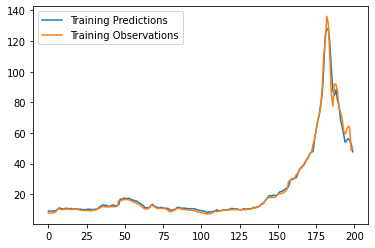

In [ ]:
#Plotting model's predictions of training data v actual training observations

plt.plot(train_predictions2)
plt.plot(y_train2)
plt.legend(['Training Predictions', 'Training Observations'])

In [ ]:
#Comparing model's predictions on validation data v actual validation observations


val_predictions2 = model2.predict(X_val2).flatten()
val_results2 = pd.DataFrame(data={'Val Predictions':val_predictions2, 'Actuals':y_val2})
val_results2

,Val Predictions,Actuals
0,49.675262,54.333333
1,57.519653,51.444444
2,58.760265,47.000000
3,58.451988,43.375000
4,53.627419,41.718750
5,49.998138,48.555556
6,51.761551,51.500000
7,52.692238,49.700000
8,52.275452,47.187500
9,50.306282,44.277778


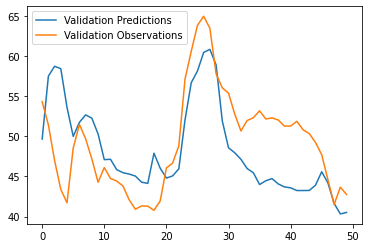

In [ ]:
#Plotting model's predictions on validation data v actual validation observations


plt.plot(val_results2['Val Predictions'])
plt.plot(val_results2['Actuals'])
plt.legend(['Validation Predictions', 'Validation Observations'])

In [ ]:
#Model now predicts on test data which it has never come across earlier
#Comparing predictions with actual test observations
test_predictions2 = model2.predict(X_test2).flatten()
test_results2 = pd.DataFrame(data={'Test Predictions':test_predictions2, 'Actuals':y_test2})
test_results2

,Test Predictions,Actuals
0,40.271828,43.406250
1,40.671906,42.281250
2,40.136360,41.412500
3,39.783840,40.605000
4,39.660400,39.937500
5,38.807182,38.022222
6,37.113518,34.994163
7,35.637077,34.453287
8,34.941391,34.848496
9,34.657257,35.592003


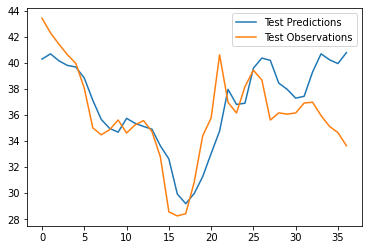

In [ ]:
#Plotting model's predictions on test data v actual test observations
#Model has done a good job since predictions are fairly close to actual data


plt.plot(test_results2['Test Predictions'])
plt.plot(test_results2['Actuals'])
plt.legend(['Test Predictions', 'Test Observations'])

In [ ]:
scores = model2.evaluate(X_test2,y_test2)

2/2 [==============================] - 0s 10ms/step - loss: 7.2223 - root_mean_squared_error: 2.6874


**Building Third Model**:

Mutlivariate GRU Model with same 3 Features


In [ ]:
#Designing GRU model

model3 = Sequential([layers.Input((3, 3)),
                    layers.GRU(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])
X_train3, y_train3, X_val3, y_val3, X_test3, y_test3 = X_train2, y_train2, X_val2, y_val2, X_test2, y_test2



In [ ]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])


model3.fit(X_train3, y_train3, validation_data=(X_val3, y_val3), epochs=100, callbacks=[cp3])

Epoch 1/100
1/7 [===>..........................] - ETA: 11s - loss: 775.6860 - root_mean_squared_error: 27.8511

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 6s 700ms/step - loss: 1131.9125 - root_mean_squared_error: 33.6439 - val_loss: 2435.2373 - val_root_mean_squared_error: 49.3481
Epoch 2/100
1/7 [===>..........................] - ETA: 0s - loss: 1238.2415 - root_mean_squared_error: 35.1887

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 623ms/step - loss: 1129.0529 - root_mean_squared_error: 33.6014 - val_loss: 2429.0852 - val_root_mean_squared_error: 49.2858
Epoch 3/100
1/7 [===>..........................] - ETA: 0s - loss: 1425.4243 - root_mean_squared_error: 37.7548

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 624ms/step - loss: 1126.1718 - root_mean_squared_error: 33.5585 - val_loss: 2422.6965 - val_root_mean_squared_error: 49.2209
Epoch 4/100
1/7 [===>..........................] - ETA: 0s - loss: 182.1215 - root_mean_squared_error: 13.4952

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 6s 994ms/step - loss: 1123.0778 - root_mean_squared_error: 33.5124 - val_loss: 2415.8721 - val_root_mean_squared_error: 49.1515
Epoch 5/100
1/7 [===>..........................] - ETA: 0s - loss: 772.7433 - root_mean_squared_error: 27.7983

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 627ms/step - loss: 1120.1329 - root_mean_squared_error: 33.4684 - val_loss: 2408.5828 - val_root_mean_squared_error: 49.0773
Epoch 6/100
1/7 [===>..........................] - ETA: 0s - loss: 1586.1129 - root_mean_squared_error: 39.8260

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 613ms/step - loss: 1116.9778 - root_mean_squared_error: 33.4212 - val_loss: 2400.9802 - val_root_mean_squared_error: 48.9998
Epoch 7/100
1/7 [===>..........................] - ETA: 0s - loss: 1284.1121 - root_mean_squared_error: 35.8345

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 644ms/step - loss: 1114.0349 - root_mean_squared_error: 33.3772 - val_loss: 2393.0095 - val_root_mean_squared_error: 48.9184
Epoch 8/100
1/7 [===>..........................] - ETA: 0s - loss: 1300.5450 - root_mean_squared_error: 36.0631

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 624ms/step - loss: 1110.8258 - root_mean_squared_error: 33.3291 - val_loss: 2385.3066 - val_root_mean_squared_error: 48.8396
Epoch 9/100
1/7 [===>..........................] - ETA: 0s - loss: 1073.0148 - root_mean_squared_error: 32.7569

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 613ms/step - loss: 1107.8268 - root_mean_squared_error: 33.2840 - val_loss: 2377.3787 - val_root_mean_squared_error: 48.7584
Epoch 10/100
1/7 [===>..........................] - ETA: 0s - loss: 1188.4271 - root_mean_squared_error: 34.4736

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 615ms/step - loss: 1104.8085 - root_mean_squared_error: 33.2387 - val_loss: 2369.6108 - val_root_mean_squared_error: 48.6786
Epoch 11/100
1/7 [===>..........................] - ETA: 0s - loss: 657.4984 - root_mean_squared_error: 25.6417

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 635ms/step - loss: 1101.5741 - root_mean_squared_error: 33.1900 - val_loss: 2362.1755 - val_root_mean_squared_error: 48.6022
Epoch 12/100
1/7 [===>..........................] - ETA: 0s - loss: 997.5084 - root_mean_squared_error: 31.5834

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 616ms/step - loss: 1098.6001 - root_mean_squared_error: 33.1451 - val_loss: 2354.4460 - val_root_mean_squared_error: 48.5226
Epoch 13/100
1/7 [===>..........................] - ETA: 0s - loss: 528.3668 - root_mean_squared_error: 22.9862

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 601ms/step - loss: 1095.1761 - root_mean_squared_error: 33.0934 - val_loss: 2346.9885 - val_root_mean_squared_error: 48.4457
Epoch 14/100
1/7 [===>..........................] - ETA: 0s - loss: 1375.9019 - root_mean_squared_error: 37.0932

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 625ms/step - loss: 1091.7648 - root_mean_squared_error: 33.0419 - val_loss: 2339.4834 - val_root_mean_squared_error: 48.3682
Epoch 15/100
1/7 [===>..........................] - ETA: 0s - loss: 1080.8123 - root_mean_squared_error: 32.8757

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 606ms/step - loss: 1088.1316 - root_mean_squared_error: 32.9868 - val_loss: 2331.9014 - val_root_mean_squared_error: 48.2898
Epoch 16/100
1/7 [===>..........................] - ETA: 0s - loss: 1284.4167 - root_mean_squared_error: 35.8388

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 620ms/step - loss: 1084.4664 - root_mean_squared_error: 32.9312 - val_loss: 2324.2205 - val_root_mean_squared_error: 48.2102
Epoch 17/100
1/7 [===>..........................] - ETA: 0s - loss: 939.5988 - root_mean_squared_error: 30.6529

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 619ms/step - loss: 1080.3170 - root_mean_squared_error: 32.8682 - val_loss: 2316.3491 - val_root_mean_squared_error: 48.1285
Epoch 18/100
1/7 [===>..........................] - ETA: 0s - loss: 972.5523 - root_mean_squared_error: 31.1858

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 625ms/step - loss: 1076.2030 - root_mean_squared_error: 32.8055 - val_loss: 2307.9050 - val_root_mean_squared_error: 48.0407
Epoch 19/100
1/7 [===>..........................] - ETA: 0s - loss: 1239.4166 - root_mean_squared_error: 35.2053

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 608ms/step - loss: 1071.8191 - root_mean_squared_error: 32.7386 - val_loss: 2299.5085 - val_root_mean_squared_error: 47.9532
Epoch 20/100
1/7 [===>..........................] - ETA: 0s - loss: 592.4095 - root_mean_squared_error: 24.3395

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 6s 1s/step - loss: 1067.4242 - root_mean_squared_error: 32.6715 - val_loss: 2291.0393 - val_root_mean_squared_error: 47.8648
Epoch 21/100
1/7 [===>..........................] - ETA: 0s - loss: 1322.1440 - root_mean_squared_error: 36.3613

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 619ms/step - loss: 1063.1951 - root_mean_squared_error: 32.6067 - val_loss: 2281.9482 - val_root_mean_squared_error: 47.7697
Epoch 22/100
1/7 [===>..........................] - ETA: 0s - loss: 1001.3327 - root_mean_squared_error: 31.6438

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 617ms/step - loss: 1058.3365 - root_mean_squared_error: 32.5321 - val_loss: 2272.8525 - val_root_mean_squared_error: 47.6744
Epoch 23/100
1/7 [===>..........................] - ETA: 0s - loss: 1044.7751 - root_mean_squared_error: 32.3230

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 617ms/step - loss: 1053.5718 - root_mean_squared_error: 32.4588 - val_loss: 2263.3833 - val_root_mean_squared_error: 47.5750
Epoch 24/100
1/7 [===>..........................] - ETA: 0s - loss: 1020.0930 - root_mean_squared_error: 31.9389

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 618ms/step - loss: 1048.6863 - root_mean_squared_error: 32.3834 - val_loss: 2253.4460 - val_root_mean_squared_error: 47.4705
Epoch 25/100
1/7 [===>..........................] - ETA: 0s - loss: 847.5996 - root_mean_squared_error: 29.1136

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 609ms/step - loss: 1043.6567 - root_mean_squared_error: 32.3057 - val_loss: 2242.7295 - val_root_mean_squared_error: 47.3575
Epoch 26/100
1/7 [===>..........................] - ETA: 0s - loss: 1156.2085 - root_mean_squared_error: 34.0031

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 612ms/step - loss: 1038.5317 - root_mean_squared_error: 32.2263 - val_loss: 2231.1064 - val_root_mean_squared_error: 47.2346
Epoch 27/100
1/7 [===>..........................] - ETA: 0s - loss: 370.4344 - root_mean_squared_error: 19.2467

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 632ms/step - loss: 1033.0525 - root_mean_squared_error: 32.1411 - val_loss: 2219.2542 - val_root_mean_squared_error: 47.1090
Epoch 28/100
1/7 [===>..........................] - ETA: 0s - loss: 517.9510 - root_mean_squared_error: 22.7585

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 635ms/step - loss: 1027.3914 - root_mean_squared_error: 32.0529 - val_loss: 2207.0806 - val_root_mean_squared_error: 46.9796
Epoch 29/100
1/7 [===>..........................] - ETA: 0s - loss: 955.2026 - root_mean_squared_error: 30.9064

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 621ms/step - loss: 1021.5730 - root_mean_squared_error: 31.9621 - val_loss: 2193.8281 - val_root_mean_squared_error: 46.8383
Epoch 30/100
1/7 [===>..........................] - ETA: 0s - loss: 2054.9407 - root_mean_squared_error: 45.3315

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 637ms/step - loss: 1015.1730 - root_mean_squared_error: 31.8618 - val_loss: 2179.5740 - val_root_mean_squared_error: 46.6859
Epoch 31/100
1/7 [===>..........................] - ETA: 0s - loss: 764.5024 - root_mean_squared_error: 27.6496

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 615ms/step - loss: 1008.2637 - root_mean_squared_error: 31.7532 - val_loss: 2163.6306 - val_root_mean_squared_error: 46.5148
Epoch 32/100
1/7 [===>..........................] - ETA: 0s - loss: 761.5565 - root_mean_squared_error: 27.5963

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 626ms/step - loss: 1000.9169 - root_mean_squared_error: 31.6373 - val_loss: 2146.5020 - val_root_mean_squared_error: 46.3304
Epoch 33/100
1/7 [===>..........................] - ETA: 0s - loss: 1165.8572 - root_mean_squared_error: 34.1446

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 624ms/step - loss: 992.8466 - root_mean_squared_error: 31.5095 - val_loss: 2126.8835 - val_root_mean_squared_error: 46.1181
Epoch 34/100
1/7 [===>..........................] - ETA: 0s - loss: 976.0327 - root_mean_squared_error: 31.2415

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 618ms/step - loss: 983.9681 - root_mean_squared_error: 31.3683 - val_loss: 2103.0518 - val_root_mean_squared_error: 45.8590
Epoch 35/100
1/7 [===>..........................] - ETA: 0s - loss: 635.9206 - root_mean_squared_error: 25.2175

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 610ms/step - loss: 973.4655 - root_mean_squared_error: 31.2004 - val_loss: 2074.1865 - val_root_mean_squared_error: 45.5432
Epoch 36/100
1/7 [===>..........................] - ETA: 0s - loss: 1052.0544 - root_mean_squared_error: 32.4354

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 634ms/step - loss: 962.6576 - root_mean_squared_error: 31.0267 - val_loss: 2043.0892 - val_root_mean_squared_error: 45.2005
Epoch 37/100
1/7 [===>..........................] - ETA: 0s - loss: 1126.3109 - root_mean_squared_error: 33.5606

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 631ms/step - loss: 951.0306 - root_mean_squared_error: 30.8388 - val_loss: 2013.1125 - val_root_mean_squared_error: 44.8677
Epoch 38/100
1/7 [===>..........................] - ETA: 0s - loss: 772.9445 - root_mean_squared_error: 27.8019

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 611ms/step - loss: 939.6155 - root_mean_squared_error: 30.6531 - val_loss: 1983.5800 - val_root_mean_squared_error: 44.5374
Epoch 39/100
1/7 [===>..........................] - ETA: 0s - loss: 718.4534 - root_mean_squared_error: 26.8040

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 7s 1s/step - loss: 928.2703 - root_mean_squared_error: 30.4675 - val_loss: 1953.8344 - val_root_mean_squared_error: 44.2022
Epoch 40/100
1/7 [===>..........................] - ETA: 0s - loss: 558.3702 - root_mean_squared_error: 23.6299

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 629ms/step - loss: 917.4129 - root_mean_squared_error: 30.2888 - val_loss: 1923.6589 - val_root_mean_squared_error: 43.8595
Epoch 41/100
1/7 [===>..........................] - ETA: 0s - loss: 619.0518 - root_mean_squared_error: 24.8808

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 628ms/step - loss: 906.5864 - root_mean_squared_error: 30.1096 - val_loss: 1893.7891 - val_root_mean_squared_error: 43.5177
Epoch 42/100
1/7 [===>..........................] - ETA: 0s - loss: 804.6647 - root_mean_squared_error: 28.3666

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 618ms/step - loss: 895.9537 - root_mean_squared_error: 29.9325 - val_loss: 1864.5028 - val_root_mean_squared_error: 43.1799
Epoch 43/100
1/7 [===>..........................] - ETA: 0s - loss: 838.5026 - root_mean_squared_error: 28.9569

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 630ms/step - loss: 886.1887 - root_mean_squared_error: 29.7689 - val_loss: 1837.1360 - val_root_mean_squared_error: 42.8618
Epoch 44/100
1/7 [===>..........................] - ETA: 0s - loss: 499.8231 - root_mean_squared_error: 22.3567

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 629ms/step - loss: 875.8666 - root_mean_squared_error: 29.5950 - val_loss: 1811.2961 - val_root_mean_squared_error: 42.5593
Epoch 45/100
1/7 [===>..........................] - ETA: 0s - loss: 709.3790 - root_mean_squared_error: 26.6342

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 618ms/step - loss: 865.4866 - root_mean_squared_error: 29.4192 - val_loss: 1785.8745 - val_root_mean_squared_error: 42.2596
Epoch 46/100
1/7 [===>..........................] - ETA: 0s - loss: 1041.6521 - root_mean_squared_error: 32.2746

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 610ms/step - loss: 855.7697 - root_mean_squared_error: 29.2535 - val_loss: 1758.7766 - val_root_mean_squared_error: 41.9378
Epoch 47/100
1/7 [===>..........................] - ETA: 0s - loss: 311.4542 - root_mean_squared_error: 17.6481

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 625ms/step - loss: 844.8072 - root_mean_squared_error: 29.0656 - val_loss: 1731.7837 - val_root_mean_squared_error: 41.6147
Epoch 48/100
1/7 [===>..........................] - ETA: 0s - loss: 720.6595 - root_mean_squared_error: 26.8451

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 616ms/step - loss: 833.7709 - root_mean_squared_error: 28.8751 - val_loss: 1703.9788 - val_root_mean_squared_error: 41.2793
Epoch 49/100
1/7 [===>..........................] - ETA: 0s - loss: 154.4589 - root_mean_squared_error: 12.4281

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 629ms/step - loss: 822.5973 - root_mean_squared_error: 28.6810 - val_loss: 1674.2544 - val_root_mean_squared_error: 40.9177
Epoch 50/100
1/7 [===>..........................] - ETA: 0s - loss: 1083.5554 - root_mean_squared_error: 32.9174

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 613ms/step - loss: 812.4958 - root_mean_squared_error: 28.5043 - val_loss: 1638.8488 - val_root_mean_squared_error: 40.4827
Epoch 51/100
1/7 [===>..........................] - ETA: 0s - loss: 981.1600 - root_mean_squared_error: 31.3235

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 644ms/step - loss: 801.2773 - root_mean_squared_error: 28.3068 - val_loss: 1601.2014 - val_root_mean_squared_error: 40.0150
Epoch 52/100
1/7 [===>..........................] - ETA: 0s - loss: 791.7606 - root_mean_squared_error: 28.1382

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 619ms/step - loss: 790.5129 - root_mean_squared_error: 28.1161 - val_loss: 1562.2406 - val_root_mean_squared_error: 39.5252
Epoch 53/100
1/7 [===>..........................] - ETA: 0s - loss: 1047.0027 - root_mean_squared_error: 32.3574

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 608ms/step - loss: 780.8248 - root_mean_squared_error: 27.9432 - val_loss: 1524.2527 - val_root_mean_squared_error: 39.0417
Epoch 54/100
1/7 [===>..........................] - ETA: 0s - loss: 731.2132 - root_mean_squared_error: 27.0410

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 610ms/step - loss: 771.4849 - root_mean_squared_error: 27.7756 - val_loss: 1486.0411 - val_root_mean_squared_error: 38.5492
Epoch 55/100
1/7 [===>..........................] - ETA: 0s - loss: 1068.3148 - root_mean_squared_error: 32.6851

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 629ms/step - loss: 762.4380 - root_mean_squared_error: 27.6123 - val_loss: 1450.4934 - val_root_mean_squared_error: 38.0853
Epoch 56/100
1/7 [===>..........................] - ETA: 0s - loss: 1007.7643 - root_mean_squared_error: 31.7453

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 5s 810ms/step - loss: 753.5640 - root_mean_squared_error: 27.4511 - val_loss: 1418.6936 - val_root_mean_squared_error: 37.6656
Epoch 57/100
1/7 [===>..........................] - ETA: 0s - loss: 938.3734 - root_mean_squared_error: 30.6329

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 627ms/step - loss: 745.1739 - root_mean_squared_error: 27.2979 - val_loss: 1387.4034 - val_root_mean_squared_error: 37.2479
Epoch 58/100
1/7 [===>..........................] - ETA: 0s - loss: 1082.4541 - root_mean_squared_error: 32.9007

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 641ms/step - loss: 736.2523 - root_mean_squared_error: 27.1340 - val_loss: 1360.5171 - val_root_mean_squared_error: 36.8852
Epoch 59/100
1/7 [===>..........................] - ETA: 0s - loss: 699.0457 - root_mean_squared_error: 26.4395

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 626ms/step - loss: 728.2460 - root_mean_squared_error: 26.9860 - val_loss: 1333.6462 - val_root_mean_squared_error: 36.5191
Epoch 60/100
1/7 [===>..........................] - ETA: 0s - loss: 868.8151 - root_mean_squared_error: 29.4757

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 619ms/step - loss: 720.2383 - root_mean_squared_error: 26.8373 - val_loss: 1309.2422 - val_root_mean_squared_error: 36.1835
Epoch 61/100
1/7 [===>..........................] - ETA: 0s - loss: 624.1128 - root_mean_squared_error: 24.9823

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 625ms/step - loss: 713.5065 - root_mean_squared_error: 26.7115 - val_loss: 1284.4095 - val_root_mean_squared_error: 35.8387
Epoch 62/100
1/7 [===>..........................] - ETA: 0s - loss: 1301.9865 - root_mean_squared_error: 36.0830

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 8s 1s/step - loss: 707.3558 - root_mean_squared_error: 26.5962 - val_loss: 1260.1957 - val_root_mean_squared_error: 35.4992
Epoch 63/100
1/7 [===>..........................] - ETA: 0s - loss: 187.0150 - root_mean_squared_error: 13.6753

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 623ms/step - loss: 700.5403 - root_mean_squared_error: 26.4677 - val_loss: 1237.7366 - val_root_mean_squared_error: 35.1815
Epoch 64/100
1/7 [===>..........................] - ETA: 0s - loss: 448.1861 - root_mean_squared_error: 21.1704

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 626ms/step - loss: 694.4841 - root_mean_squared_error: 26.3531 - val_loss: 1212.6146 - val_root_mean_squared_error: 34.8226
Epoch 65/100
1/7 [===>..........................] - ETA: 0s - loss: 83.0983 - root_mean_squared_error: 9.1158

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 635ms/step - loss: 688.3166 - root_mean_squared_error: 26.2358 - val_loss: 1187.2664 - val_root_mean_squared_error: 34.4567
Epoch 66/100
1/7 [===>..........................] - ETA: 0s - loss: 836.1919 - root_mean_squared_error: 28.9170

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 653ms/step - loss: 682.4403 - root_mean_squared_error: 26.1236 - val_loss: 1164.5540 - val_root_mean_squared_error: 34.1256
Epoch 67/100
1/7 [===>..........................] - ETA: 0s - loss: 452.2174 - root_mean_squared_error: 21.2654

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 623ms/step - loss: 675.8352 - root_mean_squared_error: 25.9968 - val_loss: 1146.5463 - val_root_mean_squared_error: 33.8607
Epoch 68/100
1/7 [===>..........................] - ETA: 0s - loss: 543.1385 - root_mean_squared_error: 23.3053

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 614ms/step - loss: 670.1160 - root_mean_squared_error: 25.8866 - val_loss: 1131.7401 - val_root_mean_squared_error: 33.6413
Epoch 69/100
1/7 [===>..........................] - ETA: 0s - loss: 887.1697 - root_mean_squared_error: 29.7854

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 624ms/step - loss: 664.8407 - root_mean_squared_error: 25.7845 - val_loss: 1123.2457 - val_root_mean_squared_error: 33.5149
Epoch 70/100
1/7 [===>..........................] - ETA: 0s - loss: 913.0426 - root_mean_squared_error: 30.2166

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 628ms/step - loss: 659.2757 - root_mean_squared_error: 25.6764 - val_loss: 1106.8174 - val_root_mean_squared_error: 33.2689
Epoch 71/100
1/7 [===>..........................] - ETA: 0s - loss: 353.1248 - root_mean_squared_error: 18.7916

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 620ms/step - loss: 653.9126 - root_mean_squared_error: 25.5717 - val_loss: 1087.8920 - val_root_mean_squared_error: 32.9832
Epoch 72/100
1/7 [===>..........................] - ETA: 0s - loss: 524.9969 - root_mean_squared_error: 22.9128

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 620ms/step - loss: 647.7300 - root_mean_squared_error: 25.4505 - val_loss: 1073.0730 - val_root_mean_squared_error: 32.7578
Epoch 73/100
1/7 [===>..........................] - ETA: 0s - loss: 465.5501 - root_mean_squared_error: 21.5766

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 630ms/step - loss: 641.6758 - root_mean_squared_error: 25.3313 - val_loss: 1055.4125 - val_root_mean_squared_error: 32.4871
Epoch 74/100
1/7 [===>..........................] - ETA: 0s - loss: 604.5179 - root_mean_squared_error: 24.5869

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 622ms/step - loss: 634.6990 - root_mean_squared_error: 25.1932 - val_loss: 1034.5842 - val_root_mean_squared_error: 32.1650
Epoch 75/100
1/7 [===>..........................] - ETA: 0s - loss: 1866.8379 - root_mean_squared_error: 43.2069

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 627ms/step - loss: 626.8484 - root_mean_squared_error: 25.0369 - val_loss: 1024.6704 - val_root_mean_squared_error: 32.0105
Epoch 76/100
1/7 [===>..........................] - ETA: 0s - loss: 473.2166 - root_mean_squared_error: 21.7535

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 619ms/step - loss: 617.1897 - root_mean_squared_error: 24.8433 - val_loss: 1022.5686 - val_root_mean_squared_error: 31.9776
Epoch 77/100
1/7 [===>..........................] - ETA: 0s - loss: 267.0502 - root_mean_squared_error: 16.3417

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 625ms/step - loss: 607.7451 - root_mean_squared_error: 24.6525 - val_loss: 1008.6509 - val_root_mean_squared_error: 31.7593
Epoch 78/100
1/7 [===>..........................] - ETA: 0s - loss: 357.2278 - root_mean_squared_error: 18.9005

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 633ms/step - loss: 599.4995 - root_mean_squared_error: 24.4847 - val_loss: 982.1891 - val_root_mean_squared_error: 31.3399
Epoch 79/100
1/7 [===>..........................] - ETA: 0s - loss: 286.2946 - root_mean_squared_error: 16.9202

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 627ms/step - loss: 590.8254 - root_mean_squared_error: 24.3069 - val_loss: 956.7344 - val_root_mean_squared_error: 30.9311
Epoch 80/100
1/7 [===>..........................] - ETA: 0s - loss: 837.6378 - root_mean_squared_error: 28.9420

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 627ms/step - loss: 582.6167 - root_mean_squared_error: 24.1375 - val_loss: 925.4075 - val_root_mean_squared_error: 30.4205
Epoch 81/100
1/7 [===>..........................] - ETA: 0s - loss: 591.2930 - root_mean_squared_error: 24.3165

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 635ms/step - loss: 573.2127 - root_mean_squared_error: 23.9419 - val_loss: 892.3781 - val_root_mean_squared_error: 29.8727
Epoch 82/100
1/7 [===>..........................] - ETA: 0s - loss: 578.1380 - root_mean_squared_error: 24.0445

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 622ms/step - loss: 563.7354 - root_mean_squared_error: 23.7431 - val_loss: 866.3398 - val_root_mean_squared_error: 29.4337
Epoch 83/100
1/7 [===>..........................] - ETA: 0s - loss: 407.2817 - root_mean_squared_error: 20.1812

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 639ms/step - loss: 555.5789 - root_mean_squared_error: 23.5707 - val_loss: 842.0725 - val_root_mean_squared_error: 29.0185
Epoch 84/100
1/7 [===>..........................] - ETA: 0s - loss: 564.5464 - root_mean_squared_error: 23.7602

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 617ms/step - loss: 547.2877 - root_mean_squared_error: 23.3942 - val_loss: 819.8298 - val_root_mean_squared_error: 28.6327
Epoch 85/100
1/7 [===>..........................] - ETA: 0s - loss: 462.1477 - root_mean_squared_error: 21.4976

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 638ms/step - loss: 538.8505 - root_mean_squared_error: 23.2132 - val_loss: 797.3724 - val_root_mean_squared_error: 28.2378
Epoch 86/100
1/7 [===>..........................] - ETA: 0s - loss: 1061.2063 - root_mean_squared_error: 32.5762

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 623ms/step - loss: 529.8964 - root_mean_squared_error: 23.0195 - val_loss: 773.1384 - val_root_mean_squared_error: 27.8054
Epoch 87/100
1/7 [===>..........................] - ETA: 0s - loss: 1050.3779 - root_mean_squared_error: 32.4095

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 630ms/step - loss: 521.4686 - root_mean_squared_error: 22.8357 - val_loss: 748.8776 - val_root_mean_squared_error: 27.3656
Epoch 88/100
1/7 [===>..........................] - ETA: 0s - loss: 187.7587 - root_mean_squared_error: 13.7025

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 623ms/step - loss: 512.6923 - root_mean_squared_error: 22.6427 - val_loss: 720.8957 - val_root_mean_squared_error: 26.8495
Epoch 89/100
1/7 [===>..........................] - ETA: 0s - loss: 845.8871 - root_mean_squared_error: 29.0841

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 681ms/step - loss: 503.8409 - root_mean_squared_error: 22.4464 - val_loss: 693.8309 - val_root_mean_squared_error: 26.3407
Epoch 90/100
1/7 [===>..........................] - ETA: 0s - loss: 351.2474 - root_mean_squared_error: 18.7416

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 9s 2s/step - loss: 494.5699 - root_mean_squared_error: 22.2389 - val_loss: 671.2527 - val_root_mean_squared_error: 25.9085
Epoch 91/100
1/7 [===>..........................] - ETA: 0s - loss: 392.2361 - root_mean_squared_error: 19.8050

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 630ms/step - loss: 486.1393 - root_mean_squared_error: 22.0486 - val_loss: 647.9787 - val_root_mean_squared_error: 25.4554
Epoch 92/100
1/7 [===>..........................] - ETA: 0s - loss: 522.7870 - root_mean_squared_error: 22.8645

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 617ms/step - loss: 477.8666 - root_mean_squared_error: 21.8602 - val_loss: 622.8135 - val_root_mean_squared_error: 24.9562
Epoch 93/100
1/7 [===>..........................] - ETA: 0s - loss: 543.9982 - root_mean_squared_error: 23.3238

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 623ms/step - loss: 469.1640 - root_mean_squared_error: 21.6602 - val_loss: 595.8920 - val_root_mean_squared_error: 24.4109
Epoch 94/100
1/7 [===>..........................] - ETA: 0s - loss: 496.9745 - root_mean_squared_error: 22.2929

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 616ms/step - loss: 460.4859 - root_mean_squared_error: 21.4589 - val_loss: 566.8331 - val_root_mean_squared_error: 23.8083
Epoch 95/100
1/7 [===>..........................] - ETA: 0s - loss: 591.7985 - root_mean_squared_error: 24.3269

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 620ms/step - loss: 451.7736 - root_mean_squared_error: 21.2550 - val_loss: 544.2707 - val_root_mean_squared_error: 23.3296
Epoch 96/100
1/7 [===>..........................] - ETA: 0s - loss: 188.8745 - root_mean_squared_error: 13.7432

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 627ms/step - loss: 442.9511 - root_mean_squared_error: 21.0464 - val_loss: 521.1663 - val_root_mean_squared_error: 22.8291
Epoch 97/100
1/7 [===>..........................] - ETA: 0s - loss: 106.3253 - root_mean_squared_error: 10.3114

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 637ms/step - loss: 434.1307 - root_mean_squared_error: 20.8358 - val_loss: 498.1849 - val_root_mean_squared_error: 22.3201
Epoch 98/100
1/7 [===>..........................] - ETA: 0s - loss: 12.0105 - root_mean_squared_error: 3.4656

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 627ms/step - loss: 425.3954 - root_mean_squared_error: 20.6251 - val_loss: 472.8335 - val_root_mean_squared_error: 21.7447
Epoch 99/100
1/7 [===>..........................] - ETA: 0s - loss: 633.3197 - root_mean_squared_error: 25.1658

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 637ms/step - loss: 417.3816 - root_mean_squared_error: 20.4299 - val_loss: 444.9191 - val_root_mean_squared_error: 21.0931
Epoch 100/100
1/7 [===>..........................] - ETA: 0s - loss: 441.8194 - root_mean_squared_error: 21.0195

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


7/7 [==============================] - 4s 619ms/step - loss: 407.7946 - root_mean_squared_error: 20.1939 - val_loss: 423.2543 - val_root_mean_squared_error: 20.5731


In [ ]:
model3 = load_model('model3/')
print(model3.summary()) #Displaying Model Summary

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                13248     
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,417
Trainable params: 16,417
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Comparing model's predictions on training data v actual training observations

train_predictions3 = model3.predict(X_train3).flatten()
train_results3 = pd.DataFrame({'Train Predictions':train_predictions3,"Actuals":y_train3})
train_results3

,Train Predictions,Actuals
0,8.593857,7.75000
1,8.736537,7.55000
2,8.511031,7.75000
3,8.527983,7.75000
4,8.857435,8.05000
...,...,...
195,30.435400,61.84375
196,30.434982,64.50000
197,30.614779,63.00000
198,30.659117,48.60000


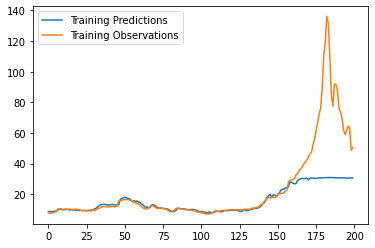

In [ ]:
#Plotting model's predictions of training data v actual training observations

plt.plot(train_predictions3)
plt.plot(y_train3)
plt.legend(['Training Predictions', 'Training Observations'])

In [ ]:
#Comparing model's predictions on validation data v actual validation observations


val_predictions3 = model3.predict(X_val3).flatten()
val_results3 = pd.DataFrame(data={'Val Predictions':val_predictions3, 'Actuals':y_val3})
val_results3

,Val Predictions,Actuals
0,30.544495,54.333333
1,30.496408,51.444444
2,30.492090,47.000000
3,30.429602,43.375000
4,30.339836,41.718750
5,30.351044,48.555556
6,30.504908,51.500000
7,30.594088,49.700000
8,30.615309,47.187500
9,30.571085,44.277778


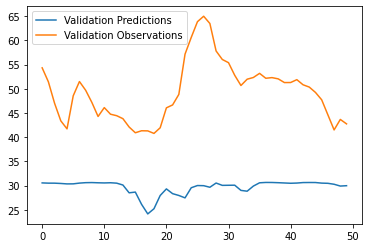

In [ ]:
#Plotting model's predictions on validation data v actual validation observations


plt.plot(val_results3['Val Predictions'])
plt.plot(val_results3['Actuals'])
plt.legend(['Validation Predictions', 'Validation Observations'])

In [ ]:
#Model now predicts on test data which it has never come across earlier
#Comparing predictions with actual test observations
test_predictions3 = model3.predict(X_test3).flatten()
test_results3 = pd.DataFrame(data={'Test Predictions':test_predictions3, 'Actuals':y_test3})
test_results3

,Test Predictions,Actuals
0,29.454157,43.406250
1,29.443655,42.281250
2,29.780016,41.412500
3,29.857487,40.605000
4,29.761015,39.937500
5,29.405867,38.022222
6,28.415487,34.994163
7,27.843073,34.453287
8,27.333120,34.848496
9,28.009865,35.592003


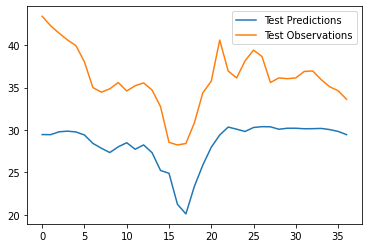

In [ ]:
#Plotting model's predictions on test data v actual test observations
#Model has done a good job since predictions are fairly close to actual data


plt.plot(test_results3['Test Predictions'])
plt.plot(test_results3['Actuals'])
plt.legend(['Test Predictions', 'Test Observations'])

In [ ]:
scores = model3.evaluate(X_test3,y_test3)

2/2 [==============================] - 0s 8ms/step - loss: 62.6654 - root_mean_squared_error: 7.9161


## PART 2: Binary Classification

In [ ]:
#Data @ https://datacatalog.worldbank.org/search/dataset/0037800

**Importing Libraries**

In [ ]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
import sklearn.preprocessing as preproc
from sklearn.feature_extraction import text
import pickle
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

**Reading CSV File**

In [ ]:
df=pd.read_csv('/content/World_Bank_Projects_downloaded_6_16_2022.csv')
df.head()

,"World Bank Projects, data as of 03/29/2022 22:00:01 EST",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Project ID,Region,Country,Project Status,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,Board Approval Date,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
1,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
2,P169983,Africa East,Republic of Angola,Active,Third Angola Growth and Inclusion Development ...,The development objective is to support the Go...,Ministry of Finance of the Republic of Angola,NaN,http://projects.worldbank.org/P169983/null?lan...,2022-03-25T00:00:00Z,...,0,REPUBLIC OF ANGOLA,Development Policy Lending,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P173711,Africa East,Republic of Madagascar,Active,Connecting Madagascar for Inclusive Growth,The Project Development Objective is to improv...,Road Agency,NaN,http://projects.worldbank.org/P173711/null?lan...,2022-03-25T00:00:00Z,...,0,REPUBLIC OF MADAGASCAR,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P175747,Middle East and North Africa,Kingdom of Morocco,Active,Resilient and Sustainable Water in Agriculture,The project development objectives (PDO) are t...,Ministry of Agriculture - Directorate of Irrig...,NaN,http://projects.worldbank.org/P175747/null?lan...,2022-03-25T00:00:00Z,...,0,Kingdom of Morocco,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Converting first row into column headers

df.columns=df.iloc[0]
df=df.iloc[2:,:]


In [ ]:
#Extracting Few Features and Displaying Dataset

df=df.iloc[:,1:7]
df.head()

,Region,Country,Project Status,Project Name,Project Development Objective,Implementing Agency
2,Africa East,Republic of Angola,Active,Third Angola Growth and Inclusion Development ...,The development objective is to support the Go...,Ministry of Finance of the Republic of Angola
3,Africa East,Republic of Madagascar,Active,Connecting Madagascar for Inclusive Growth,The Project Development Objective is to improv...,Road Agency
4,Middle East and North Africa,Kingdom of Morocco,Active,Resilient and Sustainable Water in Agriculture,The project development objectives (PDO) are t...,Ministry of Agriculture - Directorate of Irrig...
5,Africa East,Republic of Malawi,Active,Invigorating local market & competition in Pub...,Invigorating local market & competition in Pub...,Malawi - Public Procurement and Disposal of As...
6,East Asia and Pacific,Federated States of Micronesia,Active,Federated States of Micronesia Strategic Clima...,To improve the climate resilience of the Recip...,"Department of Transportation, Communications &..."


In [ ]:
#Dropping rows with null values and displaying shape

df.dropna(inplace=True)
df.shape

(6492, 6)

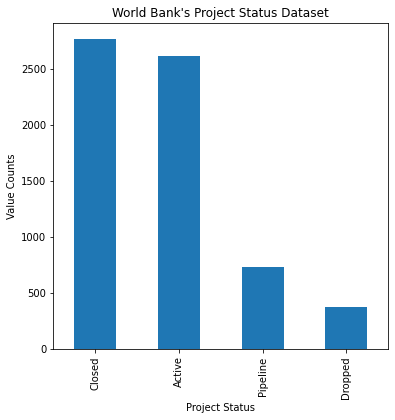

In [ ]:
#Displaying counts of the various kind of values under Project Status

ax = df['Project Status'].value_counts().plot(kind='bar', figsize=(6,6))
fig = ax.get_figure()
ax.set_title("World Bank's Project Status Dataset")
ax.set_xlabel('Project Status')
ax.set_ylabel('Value Counts');
ax

In [ ]:
#Storing the projects that have status "Closed" with Label 1 and all others with Label 0

df['Label']=0
df.loc[df['Project Status']=="Closed",['Label']]=1


In [ ]:
#Fraction of projects that have "Closed" status ie. Label 1

len(df[df['Label'] == 1])/len(df)

0.42637091805298827

**Preprocessing of Text Data**

In [ ]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [ ]:
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters, stopwords, and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    # remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    # Tokenize each word
    text =  nltk.WordPunctTokenizer().tokenize(text)
        
    return text

In [ ]:
nltk.download('stopwords')


df['Text_Cleaned'] = list(map(clean_text, df['Project Development Objective ']))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')


def lemmatized_words(text):
    lemm = nltk.stem.WordNetLemmatizer()
    df['lemmatized_text'] = list(map(lambda word:
                                     list(map(lemm.lemmatize, word)),
                                     df.Text_Cleaned))
    

lemmatized_words(df.Text_Cleaned)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [ ]:
df.head(3)

,Region,Country,Project Status,Project Name,Project Development Objective,Implementing Agency,Label,Text_Cleaned,lemmatized_text
2,Africa East,Republic of Angola,Active,Third Angola Growth and Inclusion Development ...,The development objective is to support the Go...,Ministry of Finance of the Republic of Angola,0,"[development, objective, support, government, ...","[development, objective, support, government, ..."
3,Africa East,Republic of Madagascar,Active,Connecting Madagascar for Inclusive Growth,The Project Development Objective is to improv...,Road Agency,0,"[project, development, objective, improve, con...","[project, development, objective, improve, con..."
4,Middle East and North Africa,Kingdom of Morocco,Active,Resilient and Sustainable Water in Agriculture,The project development objectives (PDO) are t...,Ministry of Agriculture - Directorate of Irrig...,0,"[project, development, objectives, pdo, enhanc...","[project, development, objective, pdo, enhance..."


**Splitting into Training and Testing Data**

In [ ]:
from sklearn.model_selection import train_test_split

training_data, test_data = sklearn.model_selection.train_test_split(df, train_size = 0.7, random_state=42)
print(training_data.shape)
print(test_data.shape)

(4544, 9)
(1948, 9)


**Bag of Words**

In [ ]:
bow_transform = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3,3], lowercase=False)
X_tr_bow = bow_transform.fit_transform(training_data['Text_Cleaned'])#Applying Bag of Words on Training Data
len(bow_transform.vocabulary_) #Displaying unique words in the bag of words model

74298

In [ ]:
X_tr_bow.shape #Shape of Training Data(Bag of Words)

(4544, 74298)

In [ ]:
X_te_bow = bow_transform.transform(test_data['Text_Cleaned']) #Applying Bag of Words on Testing data

In [ ]:
X_te_bow.shape #Shape of Testing Data(Bag of Words)

(1948, 74298)

In [ ]:
y_tr = training_data['Label'] #Training Observations
y_te = test_data['Label'] #Testing observations

**TF - IDF**

In [ ]:
#Applying TF-IDF on Bag of Words Training Data

tfidf_transform = text.TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_transform.fit_transform(X_tr_bow)


In [ ]:
#Applying TF-IDF on Bag of Words Testing Data

X_te_tfidf = tfidf_transform.transform(X_te_bow)

**User Defined Function to implement Logistic Regression**

In [ ]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
    model = LogisticRegression(C=_C).fit(X_tr, y_tr)
    score = model.score(X_test, y_test)
    print('Test Score with', description, 'features', score)
    return model

#Comparing Bag of Words and TF-IDF
model_bow = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')
model_tfidf = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')

Test Score with bow features 0.6935318275154004
Test Score with tf-idf features 0.6981519507186859


**Paramter Tuning for Better Accuracy**

In [ ]:
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
bow_search = sklearn.model_selection.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_)
tfidf_search = sklearn.model_selection.GridSearchCV(LogisticRegression(), cv=5,
                                   param_grid=param_grid_)

In [ ]:
bow_search.fit(X_tr_bow, y_tr)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [ ]:
bow_search.best_score_

0.6505284889722451

In [ ]:
tfidf_search.fit(X_tr_tfidf, y_tr)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [ ]:
tfidf_search.best_score_

0.6516312644480308

In [ ]:
bow_search.best_params_

{'C': 100.0}

In [ ]:
tfidf_search.best_params_

{'C': 100.0}

In [ ]:
bow_search.cv_results_

{'mean_fit_time': array([0.19620214, 0.18450623, 0.67477818, 0.98823957, 2.79435234,
        1.79458823]),
 'mean_score_time': array([0.00221624, 0.00103245, 0.00108447, 0.0018631 , 0.00160265,
        0.00168791]),
 'mean_test_score': array([0.56646118, 0.56646118, 0.63160393, 0.64854756, 0.64876831,
        0.65052849]),
 'param_C': masked_array(data=[1e-05, 0.001, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.001},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0}],
 'rank_test_score': array([5, 5, 4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.56655666, 0.56655666, 0.63036304, 0.65456546, 0.6479648 ,
        0.65676568]),
 'split1_test_score': array([0.56655666, 0.56655666, 0.61936194, 0.62376238, 0.62926293,
        0.6369637 ]),
 'split2_test_score': array([0.56655666, 0.56655666, 0.63586359, 0.65456546, 0.65126513,
        0.64686469

In [ ]:
tfidf_search.cv_results_

{'mean_fit_time': array([0.31288877, 0.29045739, 1.26745925, 1.72033625, 1.65936918,
        1.79076629]),
 'mean_score_time': array([0.001018  , 0.0010777 , 0.00104437, 0.00148692, 0.00109859,
        0.00106273]),
 'mean_test_score': array([0.56646118, 0.61707812, 0.64414688, 0.64810825, 0.6496501 ,
        0.65163126]),
 'param_C': masked_array(data=[1e-05, 0.001, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.001},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0}],
 'rank_test_score': array([6, 5, 4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.56655666, 0.61276128, 0.64356436, 0.6479648 , 0.66226623,
        0.66116612]),
 'split1_test_score': array([0.56655666, 0.60726073, 0.62376238, 0.62486249, 0.63146315,
        0.64466447]),
 'split2_test_score': array([0.56655666, 0.62266227, 0.64576458, 0.64906491, 0.64576458,
        0.64466447

In [ ]:
search_results = pd.DataFrame.from_dict({'bow': bow_search.cv_results_['mean_test_score'],
                               'tfidf': tfidf_search.cv_results_['mean_test_score']})
search_results

,bow,tfidf
0,0.566461,0.566461
1,0.566461,0.617078
2,0.631604,0.644147
3,0.648548,0.648108
4,0.648768,0.649650
5,0.650528,0.651631


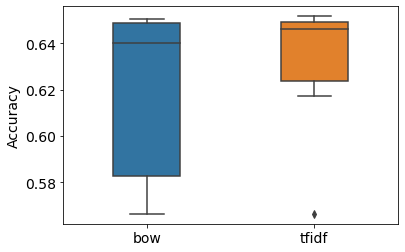

In [ ]:
ax = sns.boxplot(data=search_results, width=0.4)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize=14)

In [ ]:
#After tuning paramters for better accuracy


model_bow = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow', 
                              _C=bow_search.best_params_['C'])
model_tfidf = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf', 
                              _C=tfidf_search.best_params_['C'])

Test Score with bow features 0.7027720739219713
Test Score with tf-idf features 0.715605749486653
